In [23]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [28]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [29]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [30]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | wabrzezno
Processing Record 3 of Set 1 | kanniyakumari
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | nizhniy kuranakh
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | mocuba
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | san patricio
Proc

Processing Record 32 of Set 4 | verkh-usugli
Processing Record 33 of Set 4 | sitka
Processing Record 34 of Set 4 | vila
Processing Record 35 of Set 4 | marawi
Processing Record 36 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 37 of Set 4 | kholtoson
Processing Record 38 of Set 4 | voh
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | westport
Processing Record 41 of Set 4 | vanavara
Processing Record 42 of Set 4 | ipixuna
Processing Record 43 of Set 4 | koudougou
Processing Record 44 of Set 4 | tallahassee
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | jacareacanga
Processing Record 47 of Set 4 | blythe
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | iwanai
Processing Record 50 of Set 4 | hovd
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | moree
Processing Record 3 of Set 5 | arica
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | elko
Processing

Processing Record 21 of Set 8 | puerto penasco
Processing Record 22 of Set 8 | kalmunai
Processing Record 23 of Set 8 | shieli
Processing Record 24 of Set 8 | fort saint james
Processing Record 25 of Set 8 | gewane
Processing Record 26 of Set 8 | antsohihy
Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | dandong
Processing Record 29 of Set 8 | carora
Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | linhares
Processing Record 32 of Set 8 | arbuzynka
Processing Record 33 of Set 8 | te anau
Processing Record 34 of Set 8 | marzuq
Processing Record 35 of Set 8 | alofi
Processing Record 36 of Set 8 | montes altos
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | sivaki
Processing Record 39 of Set 8 | sorvag
City not found. Skipping...
Processing Record 40 of Set 8 | caxito
Processing Record 41 of Set 8 | doka
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | airai
Processing Record 44 of S

Processing Record 13 of Set 12 | poum
Processing Record 14 of Set 12 | alekseyevsk
Processing Record 15 of Set 12 | pahrump
Processing Record 16 of Set 12 | eureka
Processing Record 17 of Set 12 | andenes
Processing Record 18 of Set 12 | inderka
Processing Record 19 of Set 12 | ovsyanka
Processing Record 20 of Set 12 | general roca
Processing Record 21 of Set 12 | loksa
Processing Record 22 of Set 12 | vila franca do campo
Processing Record 23 of Set 12 | bacuit
City not found. Skipping...
Processing Record 24 of Set 12 | cururupu
Processing Record 25 of Set 12 | rungata
City not found. Skipping...
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | oktyabrskoye
Processing Record 28 of Set 12 | shubarkuduk
Processing Record 29 of Set 12 | kaeo
Processing Record 30 of Set 12 | at-bashi
Processing Record 31 of Set 12 | vao
Processing Record 32 of Set 12 | sopur
Processing Record 33 of Set 12 | chihuahua
Processing Record 34 of Set 12 | flinders
Processing Record 3

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wabrzezno,53.2799,18.9477,44.01,81,100,6.76,PL,2021-04-02 20:14:48
1,Kanniyakumari,8.0833,77.5667,81.39,79,23,19.60,IN,2021-04-02 20:14:49
2,Port Elizabeth,-33.9180,25.5701,60.80,82,20,11.50,ZA,2021-04-02 20:14:49
3,Hobart,-42.8794,147.3294,63.00,67,0,5.75,AU,2021-04-02 20:13:08
4,Dingle,10.9995,122.6711,74.95,90,100,7.20,PH,2021-04-02 20:14:49
5,Hermanus,-34.4187,19.2345,60.01,78,62,1.99,ZA,2021-04-02 20:14:50
6,Nizhniy Kuranakh,58.8353,125.4869,-1.30,99,100,2.39,RU,2021-04-02 20:14:50
7,Dikson,73.5069,80.5464,-16.08,84,99,4.68,RU,2021-04-02 20:14:50
8,Rikitea,-23.1203,-134.9692,76.87,79,99,11.83,PF,2021-04-02 20:14:51
9,Carnarvon,-24.8667,113.6333,77.00,94,40,8.05,AU,2021-04-02 20:14:51


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wabrzezno,PL,2021-04-02 20:14:48,53.2799,18.9477,44.01,81,100,6.76
1,Kanniyakumari,IN,2021-04-02 20:14:49,8.0833,77.5667,81.39,79,23,19.60
2,Port Elizabeth,ZA,2021-04-02 20:14:49,-33.9180,25.5701,60.80,82,20,11.50
3,Hobart,AU,2021-04-02 20:13:08,-42.8794,147.3294,63.00,67,0,5.75
4,Dingle,PH,2021-04-02 20:14:49,10.9995,122.6711,74.95,90,100,7.20
5,Hermanus,ZA,2021-04-02 20:14:50,-34.4187,19.2345,60.01,78,62,1.99
6,Nizhniy Kuranakh,RU,2021-04-02 20:14:50,58.8353,125.4869,-1.30,99,100,2.39
7,Dikson,RU,2021-04-02 20:14:50,73.5069,80.5464,-16.08,84,99,4.68
8,Rikitea,PF,2021-04-02 20:14:51,-23.1203,-134.9692,76.87,79,99,11.83
9,Carnarvon,AU,2021-04-02 20:14:51,-24.8667,113.6333,77.00,94,40,8.05


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

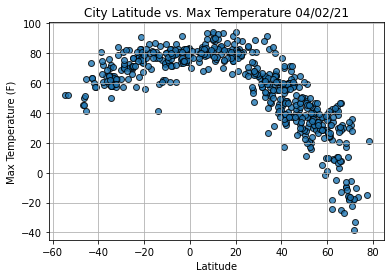

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

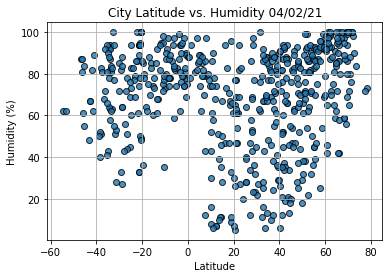

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()